In [1]:
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import random
import os
from functools import reduce
from itertools import chain
from sympy import factorint
import glob
from sklearn.utils import shuffle

In [9]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9
cm = 1/2.54
fig_folder = './Figure_3_exports'
data_folder = '../all_data/Figure_3_data'


In [3]:
df = pd.read_excel(data_folder+'/SEC-plate_reader_data.xlsx')
df

,DNA_name,Liposome_name,Volume,well_name,rep,GFP,Cy5,plate
0,Cat,DOPC,0,A1,1,64581,1074,1
1,Cat,DOPC,0,A2,2,62707,1075,1
2,Cat,DOPC,0,A3,3,59499,972,1
3,Cat,DOPC,500,B1,1,67,1,1
4,Cat,DOPC,500,B2,2,65,0,1
...,...,...,...,...,...,...,...,...
523,Blank,DMPC,3600,O11,2,771,4,2
524,Blank,DMPC,3600,O12,3,576,3,2
525,Blank,DMPC,4100,P10,1,98,4,2
526,Blank,DMPC,4100,P11,2,118,3,2


In [4]:
df.value_counts('DNA_name')

DNA_name
Cat      144
Beta      48
Blank     48
CD47      48
CD9       48
Dia       48
FFAR4     48
Mito      48
OR1A1     48
Name: count, dtype: int64

In [5]:
means = df.groupby(['DNA_name','Volume'])[['Cy5','GFP']].agg('mean').reset_index()
means.head(10)

,DNA_name,Volume,Cy5,GFP
0,Beta,0,953.000000,19506.333333
1,Beta,500,4.000000,109.000000
2,Beta,750,0.333333,108.000000
3,Beta,900,1.333333,129.666667
4,Beta,1050,24.333333,375.666667
5,Beta,1200,349.333333,3781.333333
6,Beta,1350,247.000000,2311.000000
7,Beta,1500,78.666667,533.333333
8,Beta,1650,27.333333,304.000000
9,Beta,1800,20.000000,169.000000


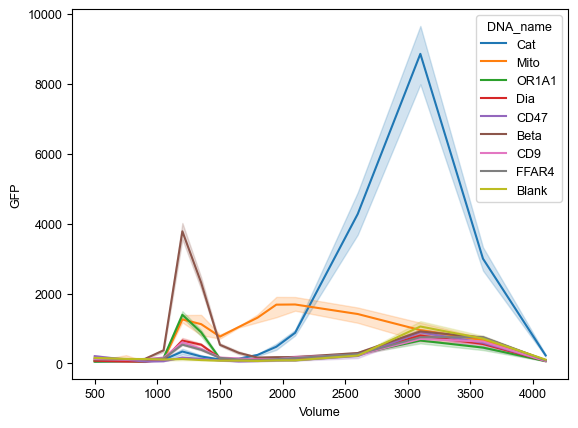

In [6]:
t = df[df['Volume'].between(500,6000)]
# t = t[t['DNA_name'] != 'Cat']

sns.lineplot(data=t,x='Volume',y='GFP',hue='DNA_name')
plt.show()

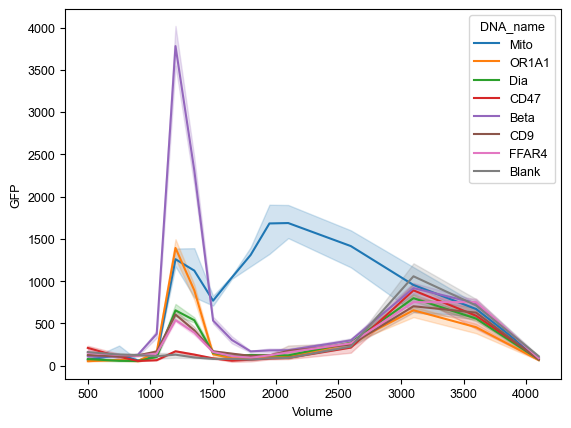

In [7]:
t = df[df['Volume'].between(500,6000)]
t = t[t['DNA_name'] != 'Cat']
# sns.lineplot(data=t,x='Volume',y='Cy5',hue='DNA_name',palette='Reds')
# ax2 = plt.twinx()
sns.lineplot(data=t,x='Volume',y='GFP',hue='DNA_name')
plt.show()

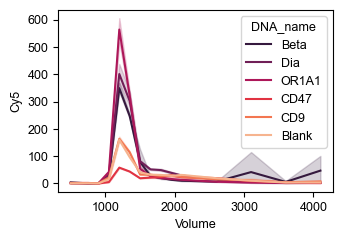

In [10]:
t = df[df['Volume'].between(500,6000)]

hue_order = ['Beta','Dia','OR1A1','CD47','CD9','Blank']
t = t[t['DNA_name'].isin(hue_order)]

fig,ax = plt.subplots(figsize=[9*cm,6*cm])

sns.lineplot(data=t,x='Volume',y='Cy5',hue='DNA_name',palette='rocket',hue_order=hue_order)

plt.savefig(fig_folder+'/Supp_fig-SEC_elution_Cy5.svg',format='svg',dpi=300)

plt.show()

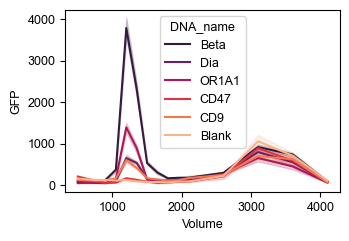

In [11]:
t = df[df['Volume'].between(500,6000)]

hue_order = ['Beta','Dia','OR1A1','CD47','CD9','Blank']
t = t[t['DNA_name'].isin(hue_order)]

fig,ax = plt.subplots(figsize=[9*cm,6*cm])

sns.lineplot(data=t,x='Volume',y='GFP',hue='DNA_name',palette='rocket',hue_order=hue_order)

plt.savefig(fig_folder+'/Supp_fig-SEC_elution_GFP.svg',format='svg',dpi=300)

plt.show()

In [12]:
t.set_index('DNA_name').drop(columns=['plate']).to_excel(data_folder+'/Supp_Fig_15A-Additional_protein_SEC.xlsx')